CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: 

The train_1 dataset has approximately equal number of yes and no in the target variable. However in the train_2 dataset, the number of yes is just around 3000 and the number of no are around 24000. Hence the train_1 has balanced class and train_2 has extremely imbalanced class. Similarly, the valid_1 dataset has approximately equal number of yes and no in the target variable. In valid_2 dataset, the number of yes is just around 840 and the number of no are around 6400. Hence the valid_1 has balanced class and valid_2 has extremely imbalanced class.

The train_1.csv has around 6700 tuples and train_2.csv has around 28000 tuples which is almost 4 times of train_1.csv. In train_1.csv, approx 5000 are missing values and in train_2.csv there are approx 23000 missing values. The valid_1.csv has around 1600 tuples and valid_2.csv has around 7000 tuples which is almost 4 times of valid_1.csv. In valid_1.csv, approx 1200 are missing values and in valid_2.csv there are approx 5800 missing values.

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.The features having continuous numeric values were extracted and stored into a num_df dataframe. The numeric attributes are age, balance, day, duration, campaign, pdays & previous. After doing missing value imputation for pdays, entire numeric dataframe num_df was normalized.

2.The categorical features were extracted and stored in catg_df dataframe. The categorical attributes are job, marital, education, default, housing, loan, contact, month & poutcome. For the features having values just yes and no, I encoded them to 1 and 0. For features with more than 2 levels, I did One hot encoding manually. The number of unique values in each feature were calculated and those many number of columns were generated. For each value of the feature the corresponding tuple was kept 1 and rest all tuples for that column are kept 0.

3.Yes. The numerical feature 'pdays' has values -1 which is basically a missing value. The number of missing values in pdays is more than 50%, its so significant that we cant entirely remove those tuples with missing values. It will reduce the dataset drastically. So I implemented missing value imputation by calculating the mean of non-missing values in 'pdays' and then replacing the missing values in 'pdays' with the mean.



In [2]:
def preprocessor(file):
    import pandas as pd
    import numpy as np
    pd.set_option('mode.chained_assignment', None)

    df = pd.read_csv(file)
    X = df.iloc[:,:16]
    y = df.iloc[:,-1]

    num_df = df.select_dtypes(include=np.number)
    pdays_missing = []
    for i in range (len(num_df)):
        if(num_df.pdays[i]!=-1):
            pdays_missing.append(num_df.pdays[i])

    for i in range (len(num_df)):
        if(num_df.pdays[i]==-1):
            num_df.pdays[i] = np.mean(pdays_missing)

    num_df = (num_df-np.mean(num_df))/(np.std(num_df))
    for i in range(len(num_df.columns)):
        X[num_df.columns[i]] = num_df[num_df.columns[i]]

    catg_df = X.select_dtypes(include=np.object)
    for i in range(len(catg_df.columns)):
        key = catg_df[catg_df.columns[i]].unique()
        count = len(key)
        if count == 2:
            for j in range(len(X)):
                if catg_df[catg_df.columns[i]][j]=='yes':
                    X[catg_df.columns[i]][j]=1
                else:
                    X[catg_df.columns[i]][j]=0
        else:
            dictionary={}
            for j in range(len(key)):
                dictionary[catg_df.columns[i]+'_'+key[j]]=[0]*len(catg_df)
            for k in range(len(catg_df)):
                dictionary[catg_df.columns[i]+'_'+catg_df[catg_df.columns[i]][k]][k]=1
            del X[catg_df.columns[i]]
            for l in dictionary:
                X[l]=dictionary[l]    
    
    for j in range(len(y)):
        if y[j]=='yes':
            y[j]=1
        else:
            y[j]=0
    return X,y

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

The best regularization coeffient is 𝜆 =  8.998795255771784
The validation accuracy is :  0.7206142941523922


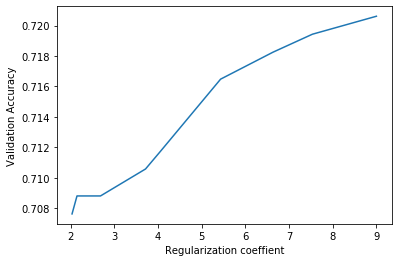

The accuracy for test dataset is : 0.7221054959637289


In [34]:
# PROBLEM 1, TASK 2 CODE GOES HERE

X_train, y_train = preprocessor('train_1.csv')
X_test, y_test = preprocessor('valid_1.csv')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random

score = []
lamda = []
for i in range(10):
    lamda.append(random.uniform(0.1,10))
lamda.sort()

for i in range(len(lamda)):
    dummy = []
    reg = LogisticRegression(max_iter=500, penalty='l2',C=1/lamda[i], solver='lbfgs')
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    dummy.append(accuracy_score(y_test, y_pred))
    score.append(np.mean(dummy))

l = lamda[score.index(max(score))]
print('The best regularization coeffient is 𝜆 = ',l)
print('The validation accuracy is : ',max(score))
plt.plot(lamda,score)
plt.xlabel('Regularization coeffient')
plt.ylabel('Validation Accuracy')
plt.show()

X_final, y_final = preprocessor('test.csv')
y_train = y_train.astype('int')
y_final = y_final.astype('int')

import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random

reg = LogisticRegression(max_iter=500, penalty='l2',C=l, solver='lbfgs')
reg.fit(X_train, y_train)
y_predict = reg.predict(X_final)

print('The accuracy for test dataset is :',accuracy_score(y_final,y_predict))

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

The best regularization coeffient is 𝜆 =  9.807029181565492
The validation accuracy is :  0.8787669339231408


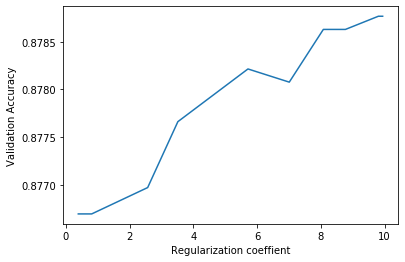

The accuracy for test dataset is : 0.8803494415570055


In [4]:
# PROBLEM 1, TASK 3 CODE GOES HERE

X_train, y_train = preprocessor('train_2.csv')
X_test, y_test = preprocessor('valid_2.csv')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random

score = []
lamda = []
for i in range(10):
    lamda.append(random.uniform(0.1,10))
lamda.sort()

for i in range(len(lamda)):
    dummy = []
    reg = LogisticRegression(max_iter=500, penalty='l2',C=1/lamda[i], solver='lbfgs')
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    dummy.append(accuracy_score(y_test, y_pred))
    score.append(np.mean(dummy))

l = lamda[score.index(max(score))]
print('The best regularization coeffient is 𝜆 = ',l)
print('The validation accuracy is : ',max(score))
plt.plot(lamda,score)
plt.xlabel('Regularization coeffient')
plt.ylabel('Validation Accuracy')
plt.show()

X_final, y_final = preprocessor('test.csv')
y_train = y_train.astype('int')
y_final = y_final.astype('int')

import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random

reg = LogisticRegression(max_iter=500, penalty='l2',C=l, solver='lbfgs')
reg.fit(X_train, y_train)
y_predict = reg.predict(X_final)

print('The accuracy for test dataset is :',accuracy_score(y_final,y_predict))

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

For threshold 𝜃 =  0.8475526250545259


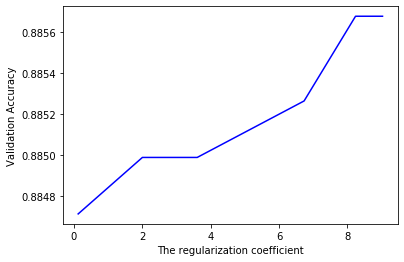

For threshold 𝜃 =  0.8868552619232295


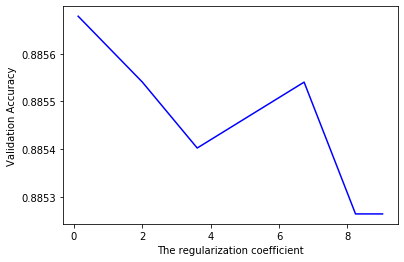

For threshold 𝜃 =  0.19174211667840174


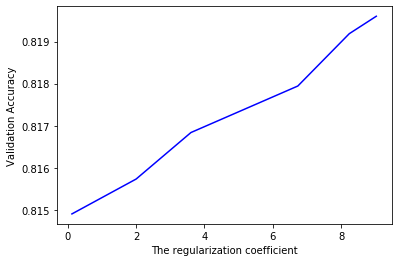

For threshold 𝜃 =  0.49550673233417053


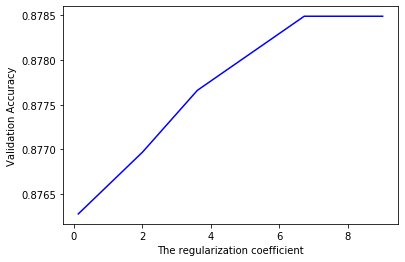

For threshold 𝜃 =  0.9361220491505926


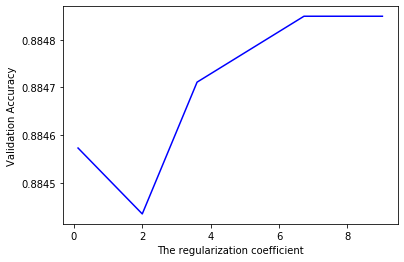

The best combination is : 
The regularization coeffient 𝜆 =  0.12686150992424014
The dynamic threshold 𝜃 =  0.8868552619232295
The validation accuracy is :  0.8856787392867017


The accuracy for test dataset is : 0.8814552692690479


In [5]:
# PROBLEM 1, TASK 4 CODE GOES HERE

X_train, y_train = preprocessor('train_2.csv')
X_test, y_test = preprocessor('valid_2.csv')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random

theta = []
for i in range(5):
    theta.append(random.uniform(0.1,1))
lamda = []
score = []
for i in range (6):
    lamda.append(random.uniform(0.1,10))
lamda.sort()
    
for i in range (len(lamda)):
    accuracy=[]
    reg = LogisticRegression(max_iter=500, penalty='l2',C=1/lamda[i], solver='lbfgs')
    reg.fit(X_train,y_train)
    p = reg.predict_proba(X_test)[:,1]
    
    for k in range(len(theta)):
        y_pred=[]
        for j in range(len(p)):
            if p[j]>=theta[k]:
                y_pred.append(1)
            else:
                y_pred.append(0)
        acc_score=accuracy_score(y_pred,y_test)
        accuracy.append(acc_score)
        score.append(acc_score)

for j in range(5):
    s=[]
    for i in range(j,len(score),5):
        s.append(score[i])
    print('For threshold 𝜃 = ',theta[j])
    plt.plot(lamda,s,color='blue')
    plt.xlabel('The regularization coefficient')
    plt.ylabel('Validation Accuracy')
    plt.show()
    
l = lamda[score.index(max(score))//6]
print('The best combination is : ')
print('The regularization coeffient 𝜆 = ',l)
print('The dynamic threshold 𝜃 = ',theta[score.index(max(score))%5])
print('The validation accuracy is : ',max(score))
print('\n')

X_final, y_final = preprocessor('test.csv')
y_train = y_train.astype('int')
y_final = y_final.astype('int')

import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import random

reg = LogisticRegression(max_iter=500, penalty='l2',C=l, solver='lbfgs')
reg.fit(X_train, y_train)
y_predict = reg.predict(X_final)

print('The accuracy for test dataset is :',accuracy_score(y_final,y_predict))

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.

The model A is trained on train_1.csv file which has around 6700 tuples. This model is tested against the valid_1.csv which is a sample of data containing around 1600 tuples which was hold out for validation. After testing different values of regularization coefficient on valid_1 dataset, we got an accuracy of around 72% for the best coefficient. Testing the same model on test.csv gave us the accuracy around same 72%. 
The model B is trained on train_2.csv file which has around 28000 tuples. This model is tested against the valid_2.csv which is a sample of data containing around 7000 tuples which was hold out for validation. After testing different values of regularization coefficient on valid_2 dataset, we got an accuracy of around 87% for the best coefficient. Testing the same model on test.csv gave us the accuracy around same 88%.
As our model A was an estimator which was underperforming, we had two options, either use a more complex model or increase the training samples. So when the training data used for model B was 4 times the training data used for model A, there was a sufficient increase in efficiency and there was a huge rise in accuracy. As the validation data was also increased while calculating regularization coefficient, model B performed very well on test.csv dataset also.
Now, for model C we tried to make the model more complex by converting the fixed threshold into a dynamic one and controlling it. The model was trained on the same train_2.csv and tested against the same valid_2.csv for different regularization coefficients. So different values of regularization coefficients were tried for 5 non consecutive threshold and the best combination gave an accuracy around 88.5. It gave similar kind of accuracy of 88% when it was tested on the test.csv dataset.
The model C is best among all the three as it is trained on large training data and also the model is little complex than other two has it controls the threshold along with trying different values of regularization coefficient. The results of accuracy is supporting this conclusion.


2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

Measuring accuracy of model for a classification problem (categorical output) is complex and time consuming compared to regression problems (continuous output). The evaluation metrics that can be used are accuracy, confusion matrix, area under curve, logarithmic loss, etc. Optimizing hyper-parameters often requires repeatedly training a model to different sets of hyper-parameters. The metric we use to compare the results should be a numeric value, and you can specify whether you want to tune your model to maximize or minimize your metric. Hence, accuracy seems to be the best choice available.

However, confusion matrix and logarithmic loss give better results for imbalanced classes whereas accuracy is the best metrics when we have balanced classes. In our scenario, the model A is trained and validated on train_1 and valid_1 datasets respectively which are datasets with balanced classes. But, model B and C are trained and validated on datasets train_2 and valid_2 respectively which are imbalanced classes. Although accuracy seems to be the good choice as evaluation metric for model A, but it will not be ideal to use it in the case of model B and model C.

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

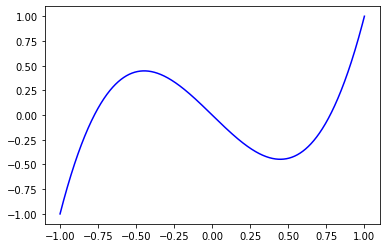

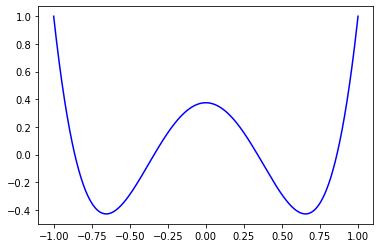

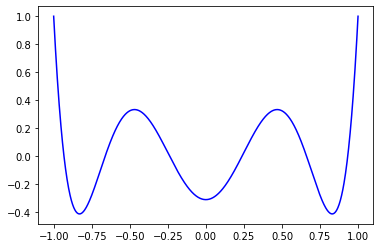

In [6]:
import numpy as np
from scipy.special import legendre
from matplotlib import pyplot as plt

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x = np.linspace(low,high,1000)
    y=0
    for i in range (degree+1):
        y+= w[i]*pow(x,i)
    plt.plot(x, y, '-b')
    plt.show()
    pass

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)  
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [22]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    import random
    
    w = get_coefficients(degree) 
    X_train = []
    for i in range(n_train):
        X_train.append(random.uniform(-1,1))
    y_train = []
    for i in range(n_train):
        noise = np.random.normal(0,sigma)
        s = 0
        for j in range(len(w)):
            s += w[j]*pow(X_train[i],j)
        y_train.append(s+noise)
        
    X_test = []
    for i in range(n_test):
        X_test.append(random.uniform(-1,1))
    y_test = []
    for i in range(n_test):
        noise = np.random.normal(0,sigma)
        s = 0
        for j in range(len(w)):
            s += w[j]*pow(X_test[i],j)
        y_test.append(s+noise)
        
    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

**Result and Explaination**: 

    Dataset of degree 10 samples:
                Training error	Testing error
    Degree 2	0.091084	    0.140548
    Degree 10	0.018993	    0.242902

The dataset of degree 10 is generated randomly with a slight noise which is a normal of standard deviation 0.2. As we increase the degree of our model from quadratic to degree 10, with such a high degree of flexibility, the model does its best to account for every single training point. Also as there is noise in data, the higher degree model also tries to fit the noise too. Hence, it overfits all the training data and gives best results on training data but then gives poor estimates on testing data. Hence the training error decreases significantly but there is a very significant increase in testing error. This conclusion is supported by the results obtained below in the table.

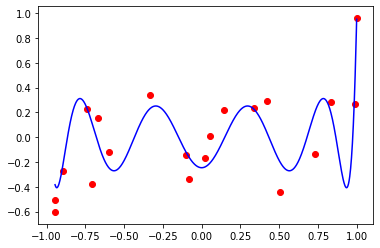

In [23]:
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)
plt.scatter(X_train,y_train,color='red')
low = min(X_train)
high = max(X_train)
visualize_function(10,low,high)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

Xa = np.asarray(X_train)
Xb = np.asarray(X_test)
X_train1 = Xa.reshape(20,1)
X_test1 = Xb.reshape(20,1)

poly1 = PolynomialFeatures(degree=2)
Xpol_train1 = poly1.fit_transform(X_train1)
Xpol_test1 = poly1.fit_transform(X_test1)

poly1.fit(Xpol_train1, y_train) 
reg1 = LinearRegression() 
reg1.fit(Xpol_train1, y_train)

ypred_train1 = reg1.predict(Xpol_train1)
ypred_test1 = reg1.predict(Xpol_test1)

train1_error = (mean_squared_error(y_train, ypred_train1))
test1_error = (mean_squared_error(y_test, ypred_test1))

poly2 = PolynomialFeatures(degree=10)
Xpol_train2 = poly2.fit_transform(X_train1)
Xpol_test2 = poly2.fit_transform(X_test1)

poly2.fit(Xpol_train2, y_train) 
reg2 = LinearRegression() 
reg2.fit(Xpol_train2, y_train)

ypred_train2 = reg2.predict(Xpol_train2)
ypred_test2 = reg2.predict(Xpol_test2)

train2_error = (mean_squared_error(y_train, ypred_train2))
test2_error = (mean_squared_error(y_test, ypred_train2))

print('Dataset of degree 10 samples:' )
data = {'Training error':[train1_error,train2_error], 'Testing error':[test1_error,test2_error]} 
df_table = pd.DataFrame(data, index =['Degree 2', 'Degree 10'])
df_table

Dataset of degree 10 samples:


,Training error,Testing error
Degree 2,0.091084,0.140548
Degree 10,0.018993,0.242902


### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

**Result and explaination**

    Dataset of degree 45 samples:
                Training error	Testing error
    Degree 2	5.089169e+07	3.558910e+08
    Degree 10	5.175051e+02	6.184664e+08

The dataset is generated with degree 45 but this time there is no noise present in this dataset. As the dataset is generated with degree 45, there is a significant increase in the magnitude of the errors as compared to Task 3. Also, as we increase the degree of our model from quadratic to degree 10, with such a high degree of flexibility, the model does its best to account for every single training point. Although there is no noise present, still it overfits all the training data and gives best results on training data but then gives poor estimates on testing data. The training error decreases and there is a increase in testing error but not as significant as we saw in the in Task 3 because there is no significant outliers due to noise. This conclusion is supported by the results obtained below in the table.

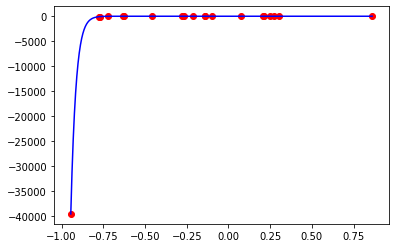

In [32]:
X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)
plt.scatter(X_train,y_train,color='red')
low = min(X_train)
high = max(X_train)
visualize_function(45,low,high)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

Xa = np.asarray(X_train)
Xb = np.asarray(X_test)
X_train1 = Xa.reshape(20,1)
X_test1 = Xb.reshape(20,1)

poly1 = PolynomialFeatures(degree=2)
Xpol_train1 = poly1.fit_transform(X_train1)
Xpol_test1 = poly1.fit_transform(X_test1)

poly1.fit(Xpol_train1, y_train) 
reg1 = LinearRegression() 
reg1.fit(Xpol_train1, y_train)

ypred_train1 = reg1.predict(Xpol_train1)
ypred_test1 = reg1.predict(Xpol_test1)

train1_error = (mean_squared_error(y_train, ypred_train1))
test1_error = (mean_squared_error(y_test, ypred_test1))

poly2 = PolynomialFeatures(degree=10)
Xpol_train2 = poly2.fit_transform(X_train1)
Xpol_test2 = poly2.fit_transform(X_test1)

poly2.fit(Xpol_train2, y_train) 
reg2 = LinearRegression() 
reg2.fit(Xpol_train2, y_train)

ypred_train2 = reg2.predict(Xpol_train2)
ypred_test2 = reg2.predict(Xpol_test2)

train2_error = (mean_squared_error(y_train, ypred_train2))
test2_error = (mean_squared_error(y_test, ypred_train2))

print('Dataset of degree 45 samples:' )
data = {'Training error':[train1_error,train2_error], 'Testing error':[test1_error,test2_error]} 
df_table = pd.DataFrame(data, index =['Degree 2', 'Degree 10'])
df_table

Dataset of degree 45 samples:


,Training error,Testing error
Degree 2,5.089169e+07,3.558910e+08
Degree 10,5.175051e+02,6.184664e+08
